In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


In [41]:
df = pd.read_csv('datas/notes.csv' , header=0, sep=",", decimal=".")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


# Mission 3
Modélisez les données à l'aide d'une régression logistique. Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.



# La régression logistique
La régression logistique est un modèle statistique permettant d’étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. Il s’agit d’un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien.

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive (valeur de 1) ou non (valeur de 0) à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1. Lorsque la valeur prédite est supérieure à un seuil, l’événement est susceptible de se produire, alors que lorsque cette valeur est inférieure au même seuil, il ne l’est pas.

## Vérification de la colinéarité des variables
Il est primordial de découvrir et quantifier à quel point deux variables sont liées. Ces relations peuvent être complexes et ne sont pas forcément visibles. Or certaines de ces dépendances affaiblissent les performances d’algorithme

Le facteur d'inflation de la variance (VIF) est une mesure de la quantité de multicolinéarité dans un ensemble de variables de Régression Logistique. Un VIF élevé indique que la variable indépendante associée est fortement colinéaire avec les autres variables du modèle. Nous pouvons avoir une idée des éventuels problèmes de colinéarité.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [43]:
reg_multi = smf.ols('diagonal  ~ height_left + height_right + margin_low + margin_up + length', data=df).fit()
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[2.249831212995896,
 2.5637087947433383,
 2.172802257913994,
 1.625230529655228,
 2.463836435483428]

VIF < 10 il n'y aura pas d'influence liée à la colinéarité des variables. Si des variables colinéaires sont de facto fortement corrélées entre elles, deux variables corrélées ne sont pas forcément colinéaires. La régression logistique peut-être modélisée sur nos six variables explicatives, il ne semble pas avoir de frein possible, ni colinéarité, il n'y a non plus pas de valeur atypique influente.

## Modélisation des données à l'aide d'une Régression Logistique

In [44]:
df['is_genuine'] = df['is_genuine'].apply(lambda x: 1 if x == True else 0)
df["is_genuine"] = df["is_genuine"].astype('category')
#set X and y
X = df.iloc[:, 1:7].values 
Y = df.iloc[:, 0].values


#split into train & test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)


Ici, l'ensemble de données est divisé en deux parties dans un rapport de 20/80. Cela signifie que 80% des données seront utilisées pour la formation des modèles et 20% pour les tests des modèles. Les données étant assez limitées, le choix des 20% pour les données de test est choisi.



In [45]:
#Instanciation d'un modèle nommé lr
lr = LogisticRegression()
lr.fit(X_train, Y_train)


LogisticRegression()

### Model Fit

[[53  1]
 [ 1 81]]


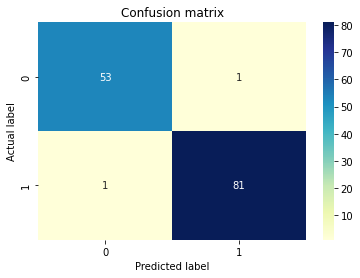

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        82

    accuracy                           0.99       136
   macro avg       0.98      0.98      0.98       136
weighted avg       0.99      0.99      0.99       136



In [46]:
Y_pred_train= lr.predict(X_train)

confusion_matrix1 = confusion_matrix(Y_train, Y_pred_train)
print(confusion_matrix1) 


#Représentation graphique de la Matrice de confusion
sns.heatmap(pd.DataFrame(confusion_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("graphiques/12 confusion_matrix.png")
plt.show()

print(metrics.classification_report(Y_train, Y_pred_train))



## Évaluation du modèle à l'aide de la matrice de confusion.

### Model Predict

In [47]:
Y_pred = lr.predict(X_test)
# predict() nous permet de prédire les étiquettes des valeurs de données sur la base du modèle entraîné.
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix) 


[[15  1]
 [ 0 18]]


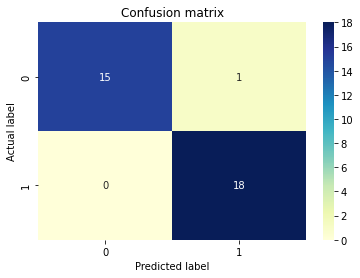

Classification_report
------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      1.00      0.97        18

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [49]:
#Représentation graphique de la Matrice de confusion
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("graphiques/13 confusion_matrix.png")
plt.show()

#Créez un rapport texte montrant les principales métriques de classification.
print ("Classification_report")
print ('------------------------')
print(metrics.classification_report(Y_test, Y_pred))


In [10]:
print ("accuracy", metrics.accuracy_score(Y_test, Y_pred))
#Score de classification de précision. التنبؤات الصحيحة من كل التنبؤات#


accuracy 0.9705882352941176


LogisticRegression veut savoir à 97 % si les pièces sont vraies ou fausses


In [11]:
print ("precision score",metrics.precision_score(Y_test, Y_pred, average='macro')) 
#La précision est le rapport tp / (tp + fp) où tp est le nombre de vrais positifs et fp le nombre de faux positifs.


precision score 0.9705882352941176



Précision :, c'est-à-dire à quel point votre modèle est précis. En d'autres termes, vous pouvez dire, lorsqu'un modèle fait une prédiction, à quelle fréquence elle est correcte.

# L'évaluation du modèle peut aussi se faire par la courbe ROC et sa métrique AUC.

In [12]:
#Récupération de la prédiction de la valeur positive
y_prob = lr.predict_proba(X_test)[:,1] 
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)

In [13]:
#Mesure AUC (Area Under the Curve): Aire sous la courbe
#from sklearn import metrics
metrics.auc(false_positive_rate, true_positive_rate)  


1.0

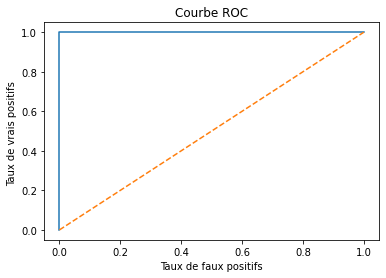

In [14]:
#Courbe ROC
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs ')
plt.title('Courbe ROC')

plt.savefig("graphiques/14.Courbe ROC.jpg")


plt.show()

In [15]:
print ("AUC&ROC",metrics.roc_auc_score(Y_test, Y_pred))


AUC&ROC 0.9722222222222222


#### Rappel :

dans le pire des cas, AUC = 0.5\
dans le meilleur des cas, AUC = 1\
Ici, nous avons un excellent modèle

L’idée de **la courbe ROC** est de faire varier le «seuil» de 1 à 0 et, pour chaque cas, calculer le taux de vrai positif et de faux positif que l’on reporte dans un graphique: en abscisse le TFP, en ordonnée le TVP.

Facile à interpréter, ne nécessite pas de mise à l'échelle, ni de calcul complexe. La régression logistique fournit un score de probabilité pour les observations. Dans ce cas précis, nous sommes très proche du classifieur optimal.

In [16]:
metrics.homogeneity_score(Y_test, Y_pred)
#Métrique d'homogénéité d'un étiquetage de cluster compte tenu d'une vérité terrain


0.8382174761998221

In [17]:
#Métrique d'exhaustivité d'un étiquetage de cluster compte tenu d'une vérité terrain.
metrics.completeness_score(Y_test, Y_pred)


0.836124066920416

L’idée de la courbe ROC est de faire varier le «seuil» de 1 à 0 et, pour chaque cas, calculer le taux de vrai positif et de faux positif que l’on reporte dans un graphique: en abscisse le TFP, en ordonnée le TVP.

Facile à interpréter, ne nécessite pas de mise à l'échelle, ni de calcul complexe. La régression logistique fournit un score de probabilité pour les observations. Dans ce cas précis, nous sommes en du classifieur optimal.

### Application sur le fichier test_exemple.csv

In [18]:
#Prédiction faite à partir du fichier "test_example.csv"
df_example = pd.read_csv('datas/test_example.csv')
df_example

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [19]:
#Préparation des données
X = df_example.copy()
X = X.iloc[:, :-1]
#Utilisation du modèle de prédiction 'lr'
probability = lr.predict_proba(X.values)[:, 1]
#Probabilités des billets établies 
proba = pd.Series(probability.round(3), name='value')
#Intégration des probabilités dans le jeu de données
df_example_final = pd.concat([df_example, proba], axis=1)
df_example_final

,diagonal,height_left,height_right,margin_low,margin_up,length,id,value
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.055
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.014
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.040
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.882
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.996


L'algorithme de classification donnera la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [20]:
#Résultats de la classification prédictive :
resultat = []
for i in df_example_final['value'] >= .5:
    if i is True :
        resultat.append('Vrai Billet')
    else :
        resultat.append('Faux Billet')

df_example_final['resultat'] = resultat
df_example_final

,diagonal,height_left,height_right,margin_low,margin_up,length,id,value,resultat
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.055,Faux Billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.014,Faux Billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.040,Faux Billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.882,Vrai Billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.996,Vrai Billet
